In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

### Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python

#### Trabajo Practico 2

Integrantes:
* Ferreyra, Mario Ezequiel (<ferreyramario7@gmail.com>)
* Gonzalez, Maria Laura (<m.laugonzalez@gmail.com>)
* Kopp, Matias Nicolas  (<koppmatias97@gmail.com>)

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

from PIL import Image
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.examples.tutorials.mnist import input_data

from IPython.display import Image as IPImage

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [3]:
print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.5


In [4]:
sns.set_style("white")

---

> Ejercicio 1

Cargamos los datos del MNIST

In [5]:
# importo y guardo MNIST data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
X_train = mnist.train.images
y_train = mnist.train.labels

X_val = mnist.validation.images
y_val = mnist.validation.labels

X_test = mnist.test.images
y_test = mnist.test.labels

In [7]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print()
print(f"X_val shape  : {X_val.shape}")
print(f"y_val shape  : {y_val.shape}")
print()
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape: (55000, 784)
y_train shape: (55000, 10)

X_val shape  : (5000, 784)
y_val shape  : (5000, 10)

X_test shape : (10000, 784)
y_test shape : (10000, 10)


---

> Ejercicio2

Defina dos redes totalmente conectadas diferentes que sean capaces de clasificar la base MNIST.

Una con 3 capas ocultas y la otra con 5.

Evalúe posible overfitting en ambas y compárelas usándola parte de entrenamiento y la parte de la base destinada para validación.

Red Fully Connected - 3 Capas Ocultas

In [8]:
model_3hl = Sequential()
model_3hl.add(Dense(512, input_shape=(784,), activation="relu"))
model_3hl.add(Dense(1024, activation="relu"))
model_3hl.add(Dense(512, activation="relu"))
model_3hl.add(Dense(10, activation="softmax"))

model_3hl.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

In [9]:
BATCH_SIZE = 128
NUM_EPOCHS = 20

history_3hl = model_3hl.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    validation_data=(X_val, y_val)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 55000 samples, validate on 5000 samples
Epoch 1/20





55000/55000 [==============================] - 10s 174us/step - loss: 0.2100 - acc: 0.9364 - val_loss: 0.1046 - val_acc: 0.9674
Epoch 2/20
55000/55000 [==============================] - 9s 164us/step - loss: 0.0827 - acc: 0.9744 - val_loss: 0.0787 - val_acc: 0.9746
Epoch 3/20
55000/55000 [==============================] - 9s 163us/step - loss: 0.0573 - acc: 0.9817 - val_loss: 0.0759 - val_acc: 0.9772
Epoch 4/20
55000/55000 [==============================] - 9s 164us/step - loss: 0.0411 - acc: 0.9866 - val_loss: 0.0795 - val_acc: 0.9794
Epoch 5/20
55000/55000 [==============================] - 9s 165us/step - loss: 0.0344 - acc: 0.9881 - val_loss: 0.0816 - val_acc: 0.9756
Epoch 6/20
55000/55000 [==============================] - 9s 164us/step - loss: 0.0270 - acc: 0.9910 - val_loss: 0.0770 - val_acc: 0.9798
Epoch 7/20
55000/550

Text(0,0.5,'Loss')

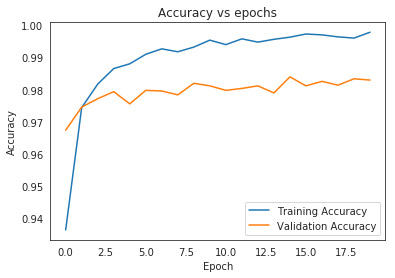

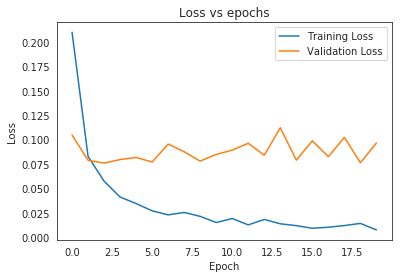

In [10]:
## Visualizamos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot(history_3hl.history['acc'])
plt.plot(history_3hl.history['val_acc'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


plt.figure()
plt.title("Loss vs epochs")
plt.plot(history_3hl.history['loss'])
plt.plot(history_3hl.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

Red Fully Connected - 5 Capas Ocultas

In [11]:
model_5hl = Sequential()
model_5hl.add(Dense(512, input_shape=(784,), activation="relu"))
model_5hl.add(Dense(1024, activation="relu"))
model_5hl.add(Dense(1024, activation="relu"))
model_5hl.add(Dense(1024, activation="relu"))
model_5hl.add(Dense(512, activation="relu"))
model_5hl.add(Dense(10, activation="softmax"))

model_5hl.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

In [12]:
BATCH_SIZE = 128
NUM_EPOCHS = 20

history_5hl = model_5hl.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    validation_data=(X_val, y_val)
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 23s 412us/step - loss: 0.2396 - acc: 0.9275 - val_loss: 0.1137 - val_acc: 0.9662
Epoch 2/20
55000/55000 [==============================] - 22s 397us/step - loss: 0.1053 - acc: 0.9692 - val_loss: 0.1000 - val_acc: 0.9686
Epoch 3/20
55000/55000 [==============================] - 22s 403us/step - loss: 0.0765 - acc: 0.9772 - val_loss: 0.0919 - val_acc: 0.9752
Epoch 4/20
55000/55000 [==============================] - 22s 399us/step - loss: 0.0528 - acc: 0.9838 - val_loss: 0.0956 - val_acc: 0.9764
Epoch 5/20
55000/55000 [==============================] - 22s 399us/step - loss: 0.0497 - acc: 0.9858 - val_loss: 0.1267 - val_acc: 0.9664
Epoch 6/20
55000/55000 [==============================] - 22s 401us/step - loss: 0.0396 - acc: 0.9885 - val_loss: 0.0741 - val_acc: 0.9822
Epoch 7/20
55000/55000 [==============================] - 22s 403us/step - loss: 0.0406 - acc: 0.9891 - val_loss: 0.1

Text(0,0.5,'Loss')

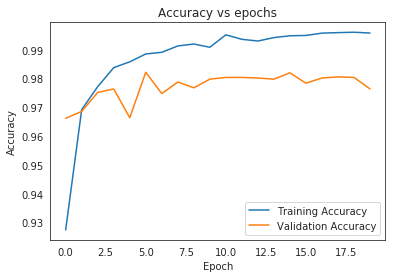

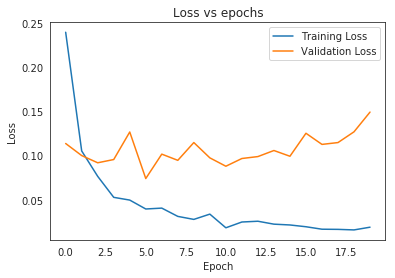

In [13]:
## Visualizamos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot(history_5hl.history['acc'])
plt.plot(history_5hl.history['val_acc'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


plt.figure()
plt.title("Loss vs epochs")
plt.plot(history_5hl.history['loss'])
plt.plot(history_5hl.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

**Conclusión**: Las dos redes overfittean, pero la que menos overfitting presenta es la red con 3 capas ocultas.

---

> Ejercicio 3

Use la comparación anterior para elegir un modelo.

Realice las predicciones en el conjunto de test y grafique 9 imágenes mal clasificada por el modelo elegido.

In [14]:
score_3hl = model_3hl.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss    : {score_3hl[0]}')
print(f'Test Accuracy: {score_3hl[1]}')

10000/10000 [==============================] - 1s 67us/step
Test Loss    : 0.1029824515523373
Test Accuracy: 0.9811


In [15]:
y_pred = model_3hl.predict_classes(X_test)

display(y_test)
display(y_pred)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
enc = OneHotEncoder()
y_pred_onehot = enc.fit_transform(y_pred.reshape(-1, 1)).toarray()

display(y_pred_onehot)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

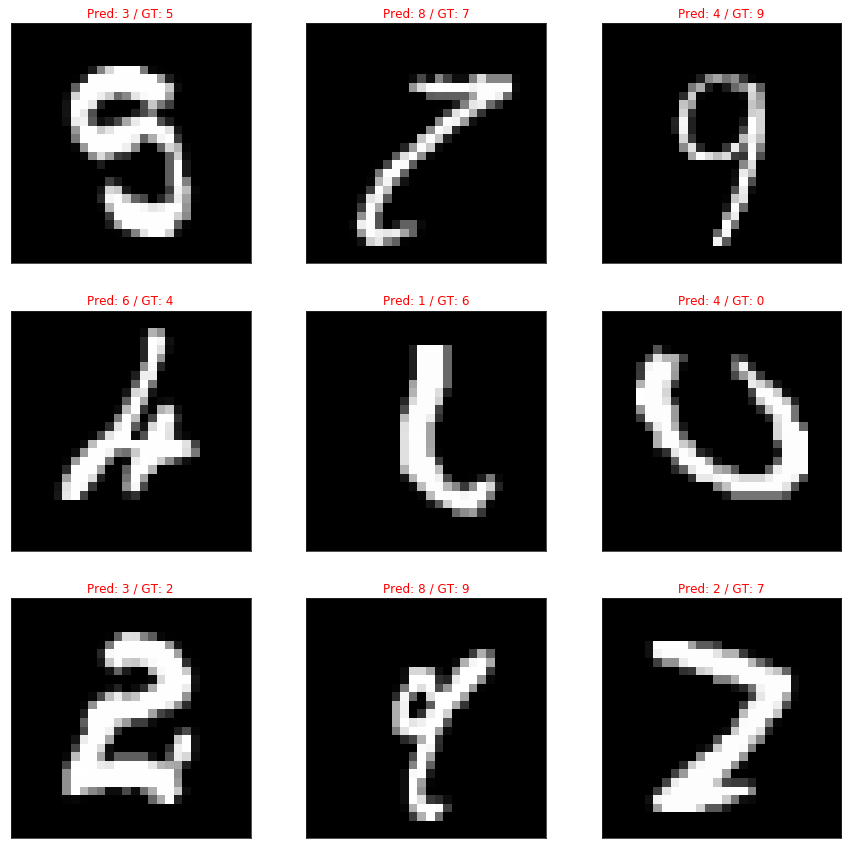

In [17]:
idxs_wrong_pred = np.array([i for i in range(len(y_test)) if (y_pred_onehot[i] != y_test[i]).any()])

# Visualizamos algunas imagenes
fig, ax = plt.subplots(3, 3, figsize=[15, 15])

for j in range(3):
    for i in range(3):
        for idx in np.random.choice(idxs_wrong_pred, 9):            
            image = X_test[idx]
            ground_truth = int(enc.inverse_transform(y_test[idx].reshape(1, -1))[0][0])
            pred = int(enc.inverse_transform(y_pred_onehot[idx].reshape(1, -1))[0][0])

            ax[i,j].imshow(image.reshape(28, 28), 'gray')
            ax[i,j].set_title(f'Pred: {pred} / GT: {ground_truth}', color='r')
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])

# fig.subplots_adjust(wspace=0.1, hspace=0)
# plt.title("9 imágenes mal clasificada en el conjunto de test")
plt.show()

---

> Ejercicio 4

Defina dos redes convolucionales diferentes que sean capaces de clasificar la base
MNIST.

Utilice para entrenar ambas la base de entrenamiento aumentada (por 21=3x3x3)
utilizando rotación, escala y traslación.

In [18]:
X_train = mnist.train.images
y_train = mnist.train.labels

X_val = mnist.validation.images
y_val = mnist.validation.labels

X_test = mnist.test.images
y_test = mnist.test.labels

In [19]:
X_train = X_train.reshape(55000, 28, 28, 1)
X_val = X_val.reshape(5000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [20]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print()
print(f"X_val shape  : {X_val.shape}")
print(f"y_val shape  : {y_val.shape}")
print()
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape: (55000, 28, 28, 1)
y_train shape: (55000, 10)

X_val shape  : (5000, 28, 28, 1)
y_val shape  : (5000, 10)

X_test shape : (10000, 28, 28, 1)
y_test shape : (10000, 10)


In [21]:
##### Some Constants #####
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10

BATCH_SIZE = 128
NUM_EPOCHS = 20

In [22]:
### Data Augmentation ###

# Training data generator
datagen_train = ImageDataGenerator(
    # rescale=1./255,  # We also can make a rescale on the data
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2
)

# Validation data generator
datagen_val = ImageDataGenerator(
    # rescale=1./255,  # We also can make a rescale on the data
)

#########################

CNN sin dropout

In [23]:
inputs = Input(shape=(IMG_ROWS, IMG_COLS, 1))

conv1 = Conv2D(64, 5, activation="relu")(inputs)
maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(128, 3, activation="relu")(maxPool1)
maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

flatten = Flatten()(maxPool2)

dense1 = Dense(256, activation="sigmoid")(flatten)
dense2 = Dense(64, activation="sigmoid")(dense1)

outputs = Dense(NUM_CLASSES, activation="softmax")(dense2)

model_cnn1 = Model(
    inputs=inputs,
    outputs=outputs
)

model_cnn1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
model_cnn1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               8194

In [25]:
history_cnn1 = model_cnn1.fit_generator(
    datagen_train.flow(X_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    validation_data=datagen_val.flow(X_val, y_val, batch_size=BATCH_SIZE),
    validation_steps=X_val.shape[0] // BATCH_SIZE
)

Epoch 1/20
429/429 [==============================] - 52s 122ms/step - loss: 0.7443 - acc: 0.7946 - val_loss: 0.1806 - val_acc: 0.9529
Epoch 2/20
429/429 [==============================] - 52s 121ms/step - loss: 0.1993 - acc: 0.9455 - val_loss: 0.0984 - val_acc: 0.9733
Epoch 3/20
429/429 [==============================] - 52s 121ms/step - loss: 0.1323 - acc: 0.9617 - val_loss: 0.0674 - val_acc: 0.9803
Epoch 4/20
429/429 [==============================] - 52s 120ms/step - loss: 0.1043 - acc: 0.9689 - val_loss: 0.0541 - val_acc: 0.9854
Epoch 5/20
429/429 [==============================] - 52s 121ms/step - loss: 0.0828 - acc: 0.9750 - val_loss: 0.0444 - val_acc: 0.9869
Epoch 6/20
429/429 [==============================] - 52s 121ms/step - loss: 0.0711 - acc: 0.9787 - val_loss: 0.0542 - val_acc: 0.9844
Epoch 7/20
429/429 [==============================] - 52s 120ms/step - loss: 0.0651 - acc: 0.9800 - val_loss: 0.0420 - val_acc: 0.9865
Epoch 8/20
429/429 [==============================] - 5

Text(0,0.5,'Loss')

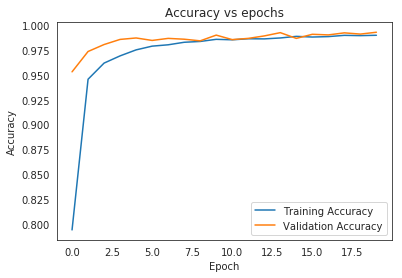

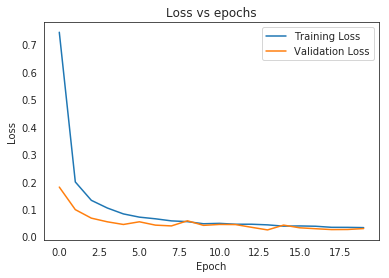

In [26]:
## Visualizamos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot(history_cnn1.history['acc'])
plt.plot(history_cnn1.history['val_acc'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


plt.figure()
plt.title("Loss vs epochs")
plt.plot(history_cnn1.history['loss'])
plt.plot(history_cnn1.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [30]:
score_cnn1 = model_cnn1.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss    : {score_cnn1[0]}')
print(f'Test Accuracy: {score_cnn1[1]}')

10000/10000 [==============================] - 3s 266us/step
Test Loss    : 0.028125276191858575
Test Accuracy: 0.9915


CNN con dropout

In [27]:
inputs = Input(shape=(IMG_ROWS, IMG_COLS, 1))

conv1 = Conv2D(64, 5, activation=None)(inputs)
bn1 = BatchNormalization()(conv1)
activation1 = Activation("relu")(bn1)
maxPool1 = MaxPooling2D(pool_size=(2, 2))(activation1)

conv2 = Conv2D(128, 5, activation=None)(maxPool1)
bn2 = BatchNormalization()(conv2)
activation2 = Activation("relu")(bn2)
maxPool2 = MaxPooling2D(pool_size=(2, 2))(activation2)

flatten = Flatten()(maxPool2)

dense1 = Dense(256, activation="sigmoid")(flatten)
dense1 = Dropout(0.5)(dense1)

dense2 = Dense(64, activation="sigmoid")(dense1)
dense2 = Dropout(0.5)(dense2)

outputs = Dense(NUM_CLASSES, activation="softmax")(dense2)

model_cnn2 = Model(
    inputs=inputs,
    outputs=outputs
)

model_cnn2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
history_cnn2 = model_cnn2.fit_generator(
    datagen_train.flow(X_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=datagen_val.flow(X_val, y_val, batch_size=BATCH_SIZE),
    validation_steps=X_val.shape[0] // BATCH_SIZE
)

Epoch 1/20
429/429 [==============================] - 122s 285ms/step - loss: 1.0040 - acc: 0.6955 - val_loss: 0.1691 - val_acc: 0.9663
Epoch 2/20
429/429 [==============================] - 121s 283ms/step - loss: 0.2789 - acc: 0.9346 - val_loss: 0.1184 - val_acc: 0.9680
Epoch 3/20
429/429 [==============================] - 121s 283ms/step - loss: 0.1983 - acc: 0.9516 - val_loss: 0.1295 - val_acc: 0.9622
Epoch 4/20
429/429 [==============================] - 122s 284ms/step - loss: 0.1598 - acc: 0.9584 - val_loss: 0.1322 - val_acc: 0.9602
Epoch 5/20
429/429 [==============================] - 122s 284ms/step - loss: 0.1443 - acc: 0.9627 - val_loss: 0.0407 - val_acc: 0.9881
Epoch 6/20
429/429 [==============================] - 121s 283ms/step - loss: 0.1271 - acc: 0.9677 - val_loss: 0.0788 - val_acc: 0.9766
Epoch 7/20
429/429 [==============================] - 121s 283ms/step - loss: 0.1221 - acc: 0.9684 - val_loss: 0.0918 - val_acc: 0.9709
Epoch 8/20
429/429 [============================

Text(0,0.5,'Loss')

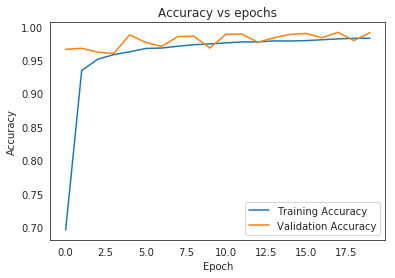

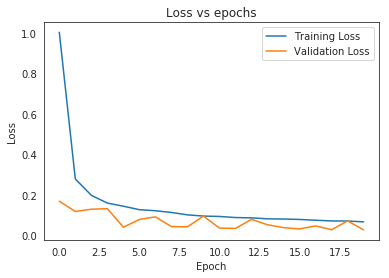

In [29]:
## Visualizamos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot(history_cnn2.history['acc'])
plt.plot(history_cnn2.history['val_acc'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


plt.figure()
plt.title("Loss vs epochs")
plt.plot(history_cnn2.history['loss'])
plt.plot(history_cnn2.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [31]:
score_cnn2 = model_cnn2.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss    : {score_cnn2[0]}')
print(f'Test Accuracy: {score_cnn2[1]}')

10000/10000 [==============================] - 6s 598us/step
Test Loss    : 0.03212649761128705
Test Accuracy: 0.9908


---

> Ejercicio 5

Describa en detalle una posible aplicación de las redes convolucionales vistas en el
taller a un problema de clasificación en ciencia, el estado o en la industria.

**Atributador de Fashion**

Una posible aplicacion de las redes convolucionales en la industria es un atributador de ropa, en el cual la red sea capaz de aprender si una remera es manga corta o manga largo, si tiene el cuello redondo o en escote V. Ademñas del color de la ropa.

Este uso es muy util en los ecommerce cuando alguien quiere vender una ropa pero no detalla las caracteristicas de la misma, siendo la red muy util en este caso ayudando a los usuarios a buscar prendas por sus atributos.